<a href="https://colab.research.google.com/github/ArchXOX/PRODIGY_DS_03/blob/main/PRODIGY_DS_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA CLEANING

In [ ]:
install.packages("googledrive")
library(googledrive)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
drive_auth()


Is it OK to cache OAuth access credentials in the folder ~/.cache/gargle
between R sessions?
1: Yes
2: No


Selection: 1


Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=0c78957982b3b9e4de0d7807c4fb48af&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQVZHN2ZpVEVmcGNrNDhtTDJJeHRwbHJ2YnJXbDF0WnVyalhJQ2dnSEFoSjZPVnBmaGhydzNMMUhMc0pKaUhlcVdibFk5QSIsInN0YXRlIjoiMGM3ODk1Nzk4MmIzYjllNGRlMGQ3ODA3YzRmYjQ4YWYifQ==


In [ ]:
# Replace the file ID with your file's ID from Google Drive
drive_download(as_id("1ArIx8S3d971QmlGP-Qyx_KXNP2jj5n22"), path = "dataset.csv")


File downloaded:

• bank.csv <id: 1ArIx8S3d971QmlGP-Qyx_KXNP2jj5n22>

Saved locally as:

• dataset.csv



In [ ]:
data1=read.csv("dataset.csv")
head(data1,5)
summary(data1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
2,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
3,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
4,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
5,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


      age            job              marital           education        
 Min.   :18.00   Length:11162       Length:11162       Length:11162      
 1st Qu.:32.00   Class :character   Class :character   Class :character  
 Median :39.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :41.23                                                           
 3rd Qu.:49.00                                                           
 Max.   :95.00                                                           
   default             balance        housing              loan          
 Length:11162       Min.   :-6847   Length:11162       Length:11162      
 Class :character   1st Qu.:  122   Class :character   Class :character  
 Mode  :character   Median :  550   Mode  :character   Mode  :character  
                    Mean   : 1529                                        
                    3rd Qu.: 1708                                        
                    Max.   :81204     

In [ ]:
#Checking for nulls
colSums(is.na(data1))

age       job   marital education   default   balance   housing      loan 
        0         0         0         0         0         0         0         0 
  contact       day     month  duration  campaign     pdays  previous  poutcome 
        0         0         0         0         0         0         0         0 
  deposit 
        0

In [ ]:
#Checking for duplicates
duplicates=duplicated(data1)
sum(duplicates)

[1] 0

In [ ]:
#Modifying deposit(y) column and factoring others
data1$deposit=ifelse(data1$deposit == "yes", 1, 0)
head(data1$deposit,5)
data1$job=as.factor(data1$job)
data1$marital=as.factor(data1$marital)
data1$education=as.factor(data1$education)
data1$default=as.factor(data1$default)
data1$housing=as.factor(data1$housing)
data1$loan=as.factor(data1$loan)
data1$contact=as.factor(data1$contact)
data1$month=as.factor(data1$month)
data1$poutcome=as.factor(data1$poutcome)

[1] 1 1 1 1 1

# DATA VISUALIZATION AND TRAIN/TEST SPLIT

In [ ]:
#Train test split
install.packages('caTools')
library(caTools)
set.seed(123)
split = sample.split(data1$deposit,SplitRatio = 0.75)
training_set = subset(data1, split == TRUE)
test_set = subset(data1, split == FALSE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’




In [ ]:
#Libraries
install.packages("tidymodels")
install.packages("tidyr")
install.packages("ggplot2")
install.packages("dplyr")
library(tidymodels)
library(tidyr)
library(ggplot2)
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘shape’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘warp’, ‘future.apply’, ‘iterators’, ‘listenv’, ‘parallelly’, ‘lhs’, ‘DiceDesign’, ‘sfd’, ‘patchwork’, ‘globals’, ‘clock’, ‘gower’, ‘ipred’, ‘timeDate’, ‘furrr’, ‘slider’, ‘doFuture’, ‘foreach’, ‘future’, ‘GPfit’, ‘modelenv’, ‘dials’, ‘hardhat’, ‘infer’, ‘modeldata’, ‘parsnip’, ‘recipes’, ‘rsample’, ‘tune’, ‘workflows’, ‘workflowsets’, ‘yardstick’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.7     ✔ recipes      1.1.0
✔ dials        1.3.0     ✔ rsample      1.2.1
✔ dplyr        1.1.4     ✔ tibble 

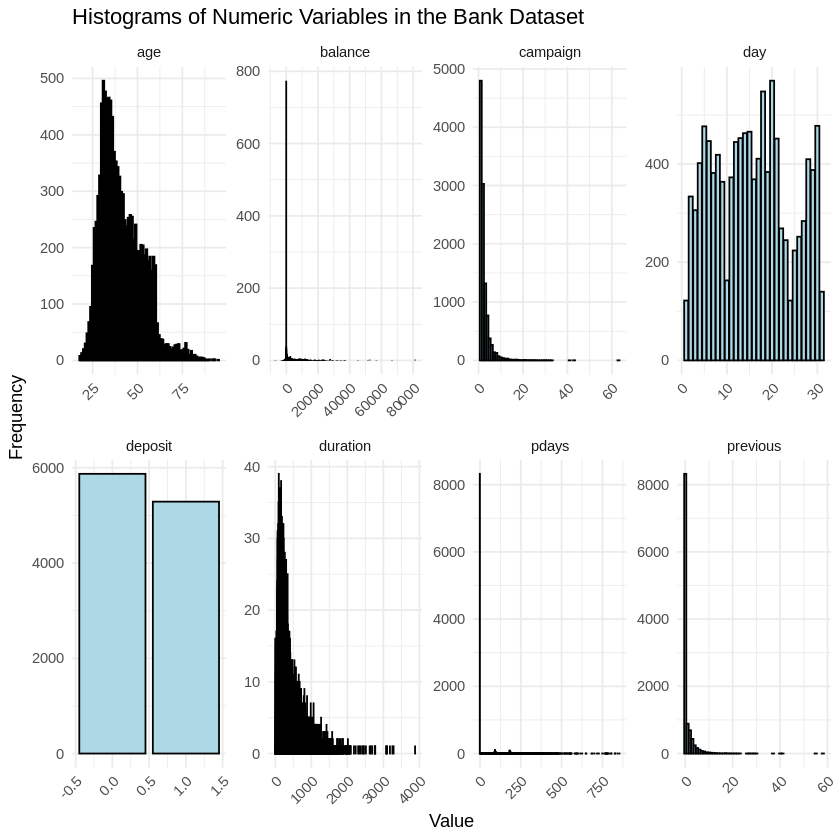

In [ ]:
#Visualizing spread of numeric variables
bank_data_long = data1 %>% pivot_longer(cols = where(is.numeric),
names_to = "variable", values_to = "value")

data1_histograms = ggplot(bank_data_long, aes(x = value)) +
geom_bar(color = "black", fill = "lightblue") +
facet_wrap(~variable, scales = "free", ncol = 4) +
labs(title = "Histograms of Numeric Variables in the Bank Dataset",
x = "Value", y = "Frequency") + theme_minimal() +
theme(axis.text.x = element_text(angle = 45, hjust = 1))

print(data1_histograms)

# DECISION TREE

In [ ]:
#Fitting decision tree to training set
install.packages("parsnip")
library(parsnip)
tree_spec=decision_tree() %>% set_engine("rpart") %>%
set_mode("regression")

tree_fit=tree_spec %>% fit(deposit ~ ., data = training_set)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#Making predictions based on test set data
library(dplyr)
predictions=tree_fit %>% predict(test_set) %>% pull(.pred)

In [ ]:
#Model evaluation
install.packages("yardstick")
library(yardstick)
metrics=metric_set(rmse, rsq)
model_performance=test_set %>% mutate(predictions = predictions) %>%
metrics(truth = deposit, estimate = predictions)
print(model_performance)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# A tibble: 2 × 3
  .metric .estimator .estimate
  <chr>   <chr>          <dbl>
1 rmse    standard       0.380
2 rsq     standard       0.422


RMSE : Gives an estimate of the amount of error between actual and predicted values. Since the value is low(0.380), it indicates toward a good regression model.

R-Squared : Determines the amount of variation in the dependent variable that can be explained by the independent variables. Here 42.2% or 0.422 of the deposit(y) variable is explained by the other variables.

In [ ]:
#Visualizing decision tree
install.packages('rpart.plot')
library(rpart.plot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




Regression tree:
rpart::rpart(formula = deposit ~ ., data = data)

Variables actually used in tree construction:
[1] contact  duration housing  month    poutcome

Root node error: 2087.3/8372 = 0.24932

n= 8372 

         CP nsplit rel error  xerror      xstd
1  0.202528      0   1.00000 1.00015 0.0011470
2  0.055352      1   0.79747 0.80807 0.0086137
3  0.051946      2   0.74212 0.71739 0.0095597
4  0.046505      3   0.69017 0.70660 0.0096621
5  0.031687      4   0.64367 0.65583 0.0096203
6  0.026003      5   0.61198 0.62874 0.0096960
7  0.023881      6   0.58598 0.61139 0.0096143
8  0.013105      7   0.56210 0.57654 0.0095641
9  0.012327      8   0.54899 0.56247 0.0098153
10 0.010000      9   0.53667 0.55219 0.0098513


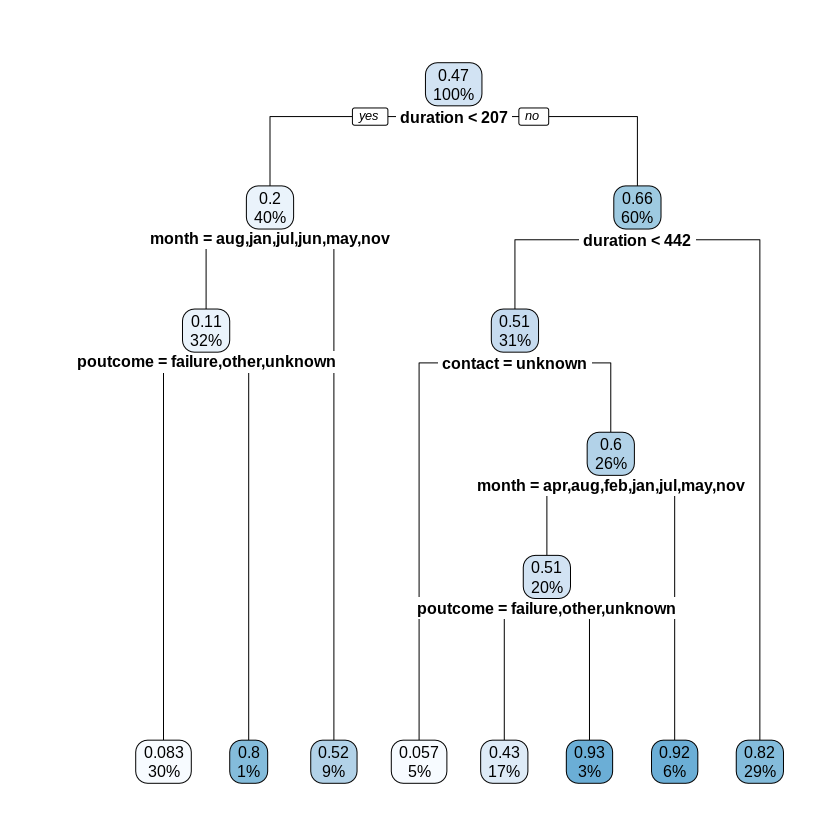

In [ ]:
#Extract the rpart object from the tree_fit
rpart_tree=tree_fit$fit

#Print the complexity parameter (cp) table
printcp(rpart_tree)

#Prune the tree
pruned_tree=prune(rpart_tree, cp = 0.01)
# Adjust cp to prune to a simpler tree

#Futhur pruning
pruned_subtree = prune(pruned_tree, cp = 0.02)  # Prune further to simplify
rpart.plot(pruned_subtree, roundint = FALSE, cex = 0.8)

In [ ]:
#Decision rules
rules=rpart.rules(tree_fit$fit,roundint=FALSE)
print(rules)

 deposit                                                                                                                                                                                   
   0.057 when duration is 207 to 442                                                                                                    & contact is               unknown                 
   0.078 when duration <   78        & month is        apr or dec or feb or mar or oct or sep                                                                                              
   0.083 when duration <  207        & month is        aug or jan or jul or jun or may or nov & poutcome is failure or other or unknown                                                    
   0.269 when duration is 207 to 442 & month is apr or aug or feb or jan or jul or may or nov & poutcome is failure or other or unknown & contact is cellular or telephone & housing is yes
   0.546 when duration is 207 to 442 & month is apr or aug o

SUMMARY :

1) Low Probability (5.7%):

* Duration of the interaction is between 207 and 442 seconds.

* Contact method is unknown

2) Moderate Probability (7.8% - 8.3%):

* Duration of the interaction is between 78 and 207 seconds.

* Previous outcome (poutcome) was failure, other, or unknown.

3) Higher Probability (26.9% - 80.0%):

* Duration is between 207 and 442 seconds.

* Month is either April, August, February, January, July, May, or November.

* Previous outcome (poutcome) was success.

* Contact method is cellular or telephone.

* Housing loan is no.

4) Very High Probability (81.7% - 92.6%):

* Duration is 442 seconds or more.

* Contact method is cellular or telephone.

* Previous outcome (poutcome) was success.


--> Longer durations generally result in higher probability of customer making deposits.

--> Month and contact method plays a crucial role in likelihod of deposit.

--> Previous outcome(poutcome) especially if 'sucess', increases probability of deposit.

In [ ]:
#Variable importance
tree_fit=rpart(deposit ~ ., data = training_set)
importance_values=tree_fit$variable.importance
print(importance_values)

   duration       month    poutcome     contact     housing       pdays 
565.6188752 176.7159768 112.5411533 108.4253097  34.5550844  11.8140728 
   campaign    previous         age         day         job     balance 
 10.9800138   8.3833142   6.3465239   4.9951702   4.2350868   1.6436856 
    default 
  0.2486819 


Most important variables in predicting lieklihood of deposit is :

1) Duration - Length of the call.

2) Month

3) Poutcome - Outcome of previous campaigns

Least important variables :

1) Age

2) Job

3) Default - Whether the customer has credit in default

# TEST RUN ON NEW DATA

In [ ]:
new_data=tibble(
  age = c(34, 49, 31, 42, 29),

  job = factor(c("technician", "blue-collar", "admin.",
	  "services", "management"), levels = c("admin.",
        "blue-collar", "entrepreneur", "housemaid", "management",
        "retired", "self-employed", "services", "student", "technician",
        "unemployed", "unknown")),

  marital = factor(c("married",
        "single", "married", "divorced", "single"),
         levels = c("divorced", "married", "single")),

  education = factor(c("secondary", "primary",
        "tertiary", "secondary", "tertiary"),levels =
         c("primary", "secondary", "tertiary", "unknown")),

  default = factor(c("no", "no", "no", "yes", "no"),
         levels = c("no", "yes")),

  balance = c(1500, 500, 1200, -200, 300),

  housing = factor(c("yes", "no", "yes", "yes", "no"),
         levels = c("no", "yes")),

  loan = factor(c("no", "yes",
         "no", "no", "no"), levels = c("no", "yes")),

  contact = factor(c("cellular", "unknown",
         "telephone", "cellular", "telephone"),
          levels = c("cellular", "telephone", "unknown")),

  day = c(15, 7, 20, 18, 9),

  month = factor(c("may", "jul", "aug", "jun", "nov"),
          levels = c("jan", "feb", "mar", "apr",
         "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec")),

  duration = c(300, 180, 250, 145, 380),

  campaign = c(1, 2, 3, 2, 1),

  pdays = c(999, 999, 5, 999, 999),

  previous = c(0, 0, 1, 0, 0),

  poutcome = factor(c("unknown", "unknown",
         "failure", "unknown", "unknown"),levels = c("failure",
         "success", "unknown")))

predictions=predict(tree_fit, new_data)
print(predictions)


         1          2          3          4          5 
0.26868327 0.08254717 0.26868327 0.08254717 0.54578313 


Numbers 1-5 can be considered as 5 customers along with all their data. Based on the model, the values are the predictions/probabilites that the cutomer will make a deposit.

There is 54.6% chance that Customer 5 will subscribe.
Customer 2 and 4 don't seem too keen to subscibe since they show a very low probability of only 8.25%